In [1]:
#imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.discretisation import EqualFrequencyDiscretiser

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# EDA

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [6]:
#Dropping unimportant columns
data = train.drop(['PassengerId','Name','Cabin','Ticket'], axis = 1)
data.columns = data.columns.str.lower()

Exploring data

In [7]:
display(data)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


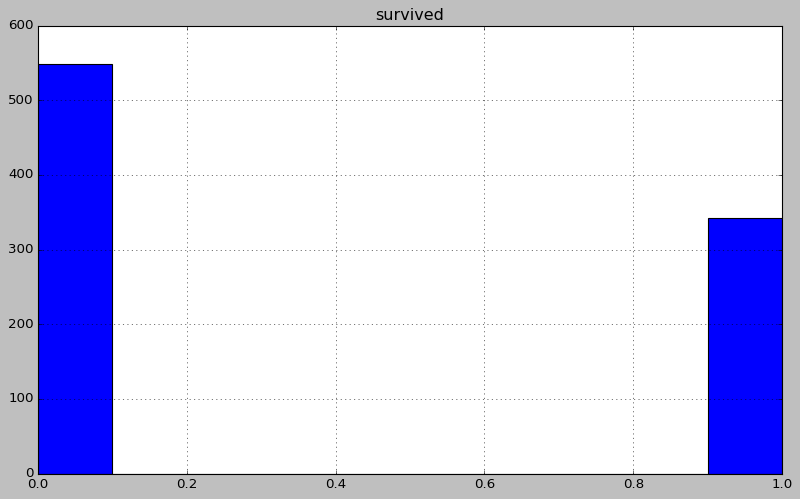

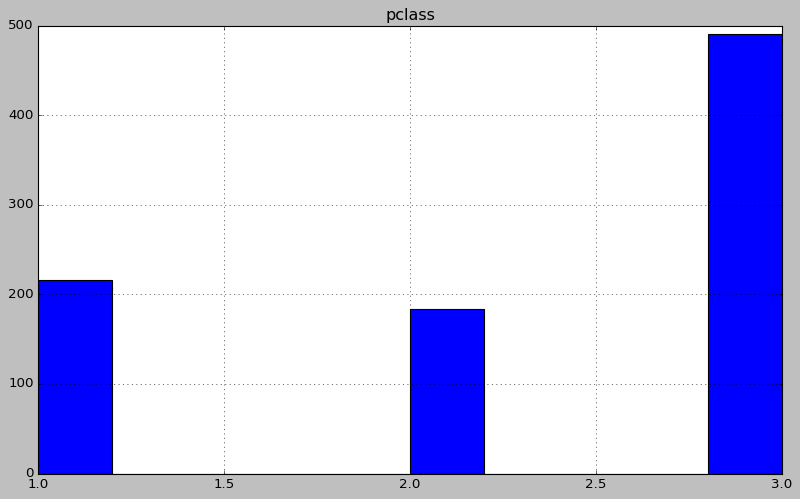

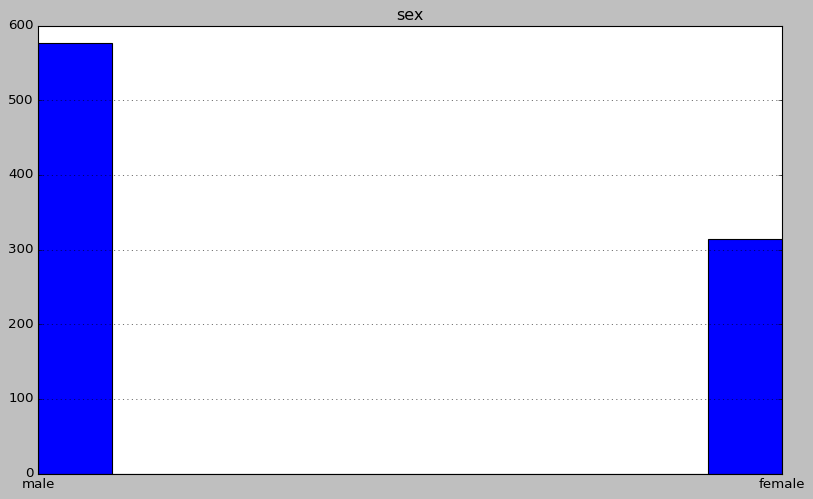

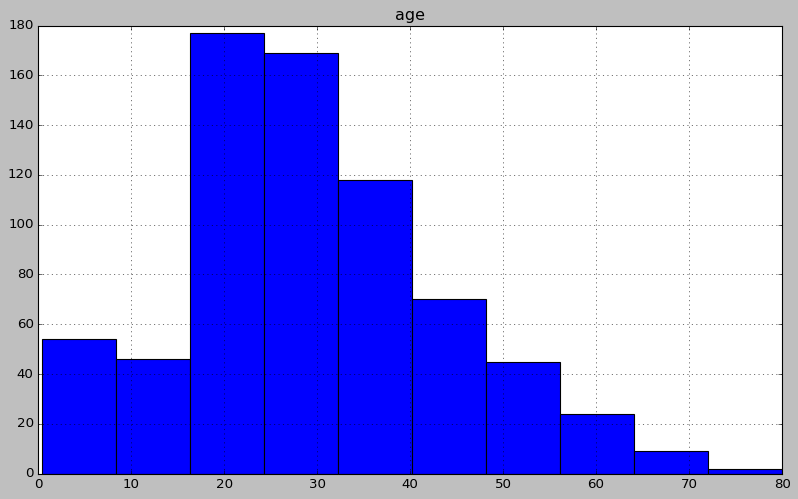

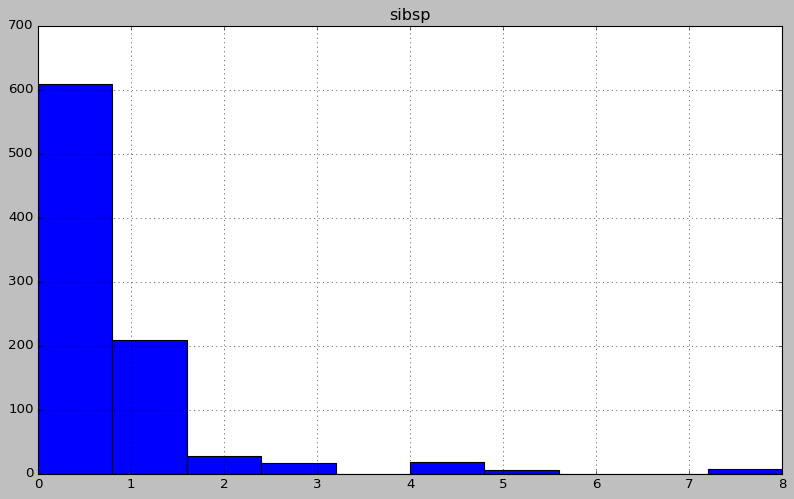

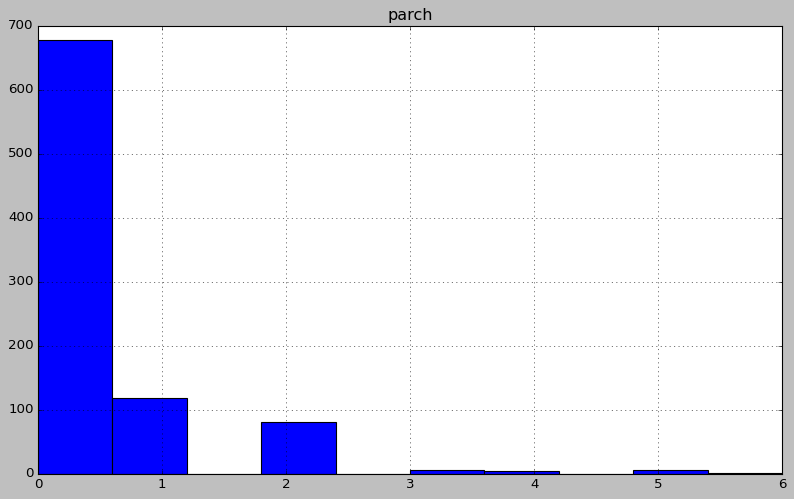

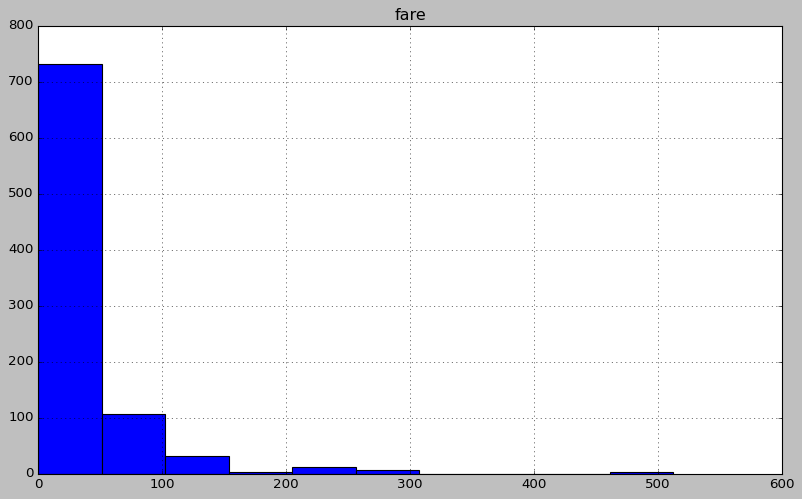

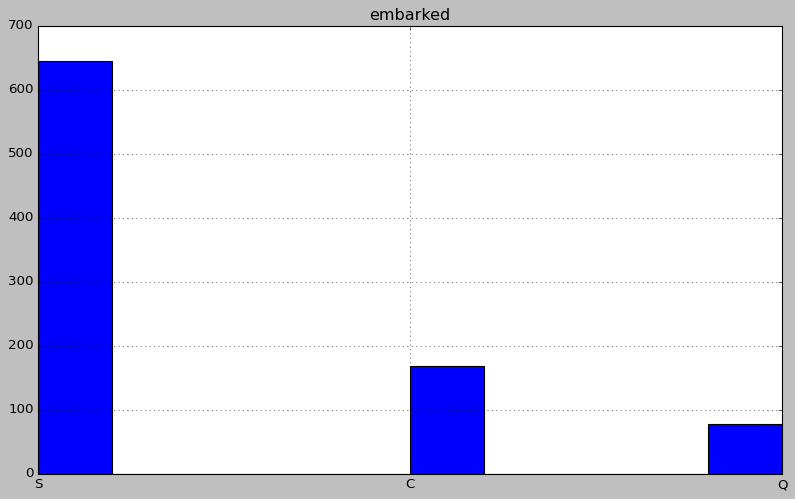

In [8]:
for col in data.columns:
    plt.style.use('classic')
    plt.figure(figsize=(12,7))
    plt.title(f"{col}")
    data[col].hist()
    plt.show()

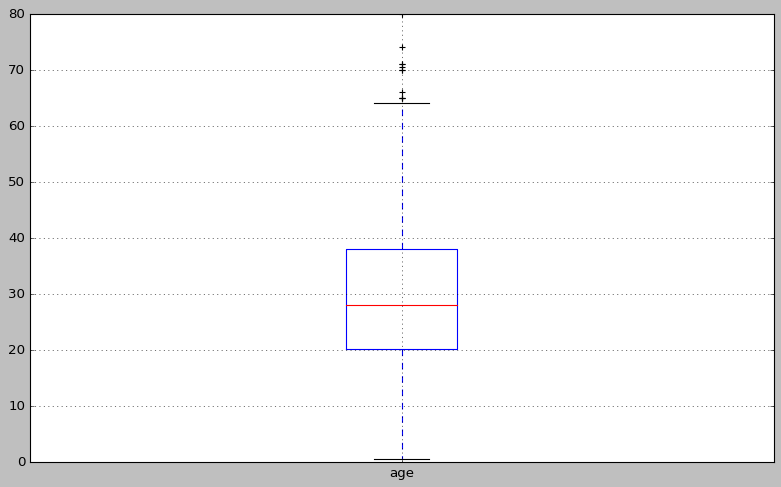

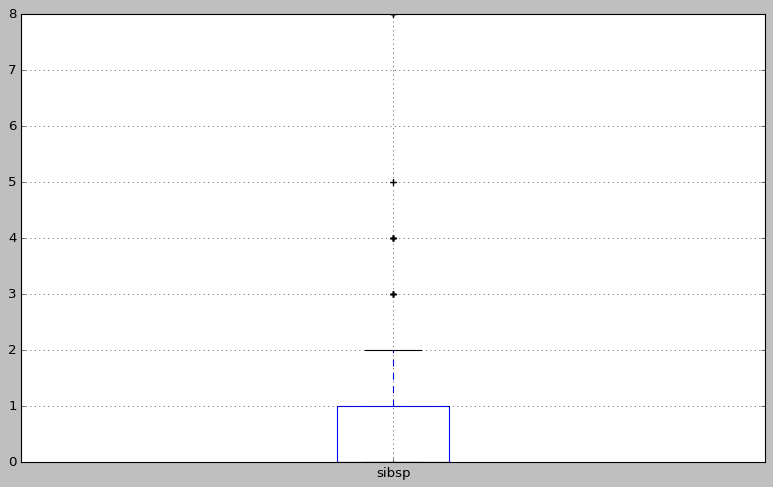

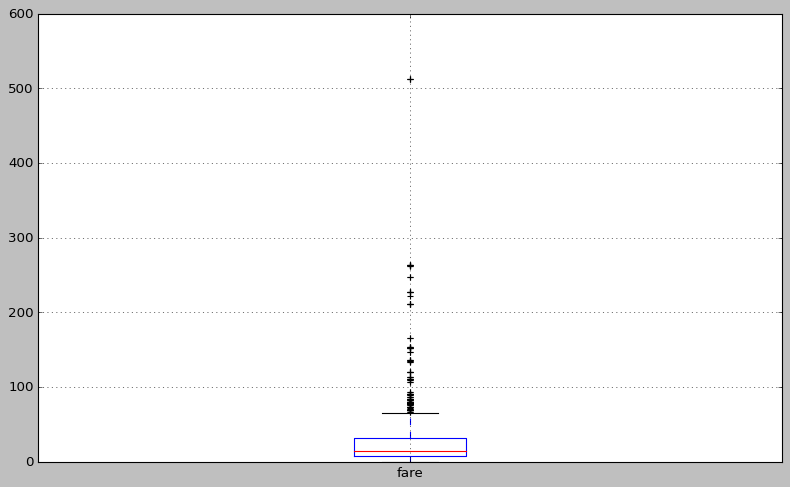

In [9]:
for col in ['age','sibsp','fare']:
    plt.style.use('classic')
    plt.figure(figsize=(12,7))
    data.boxplot(col)
    plt.show()

<ipython-input-10-43be206e3fd6>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


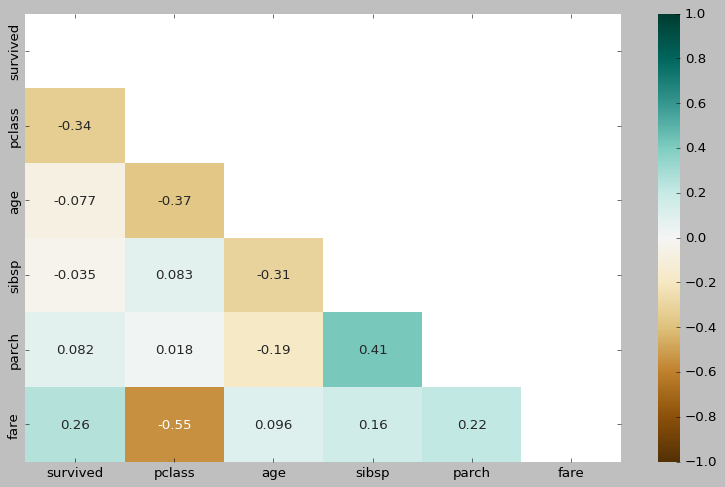

In [10]:
plt.style.use('classic')
plt.figure(figsize=(12,7))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

pclass,1,2,3
survived,136,87,119


<AxesSubplot:>

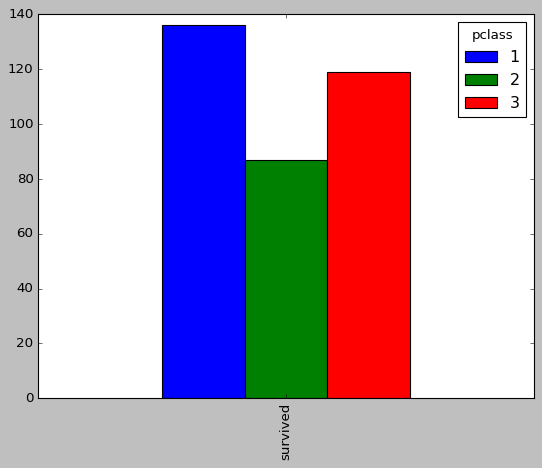

In [11]:
a = pd.DataFrame(pd.pivot_table(data, columns = 'pclass', values = 'survived', aggfunc=sum))
display(a)
a.plot.bar()

<AxesSubplot:>

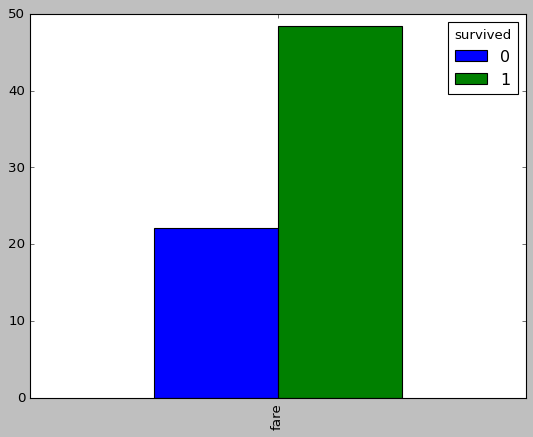

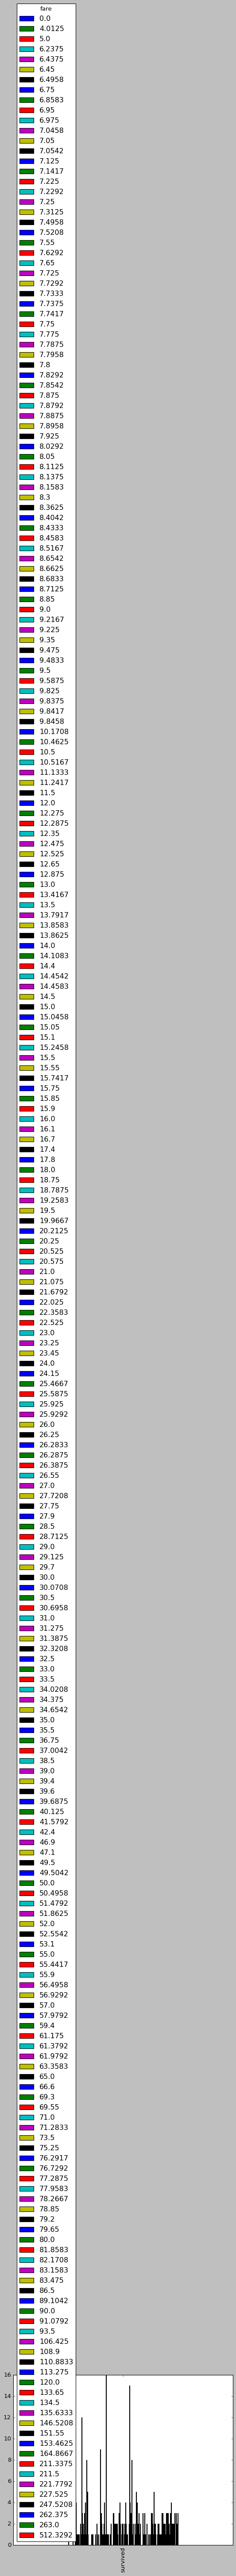

In [12]:
a = pd.DataFrame(pd.pivot_table(data, columns = 'survived', values = 'fare', aggfunc=np.mean))
a.plot.bar()

a = pd.DataFrame(pd.pivot_table(data, columns = 'fare', values = 'survived', aggfunc=sum))
a.plot.bar()

parch,0,1,2,3,4,5,6
survived,233,65,40,3,0,1,0


<AxesSubplot:>

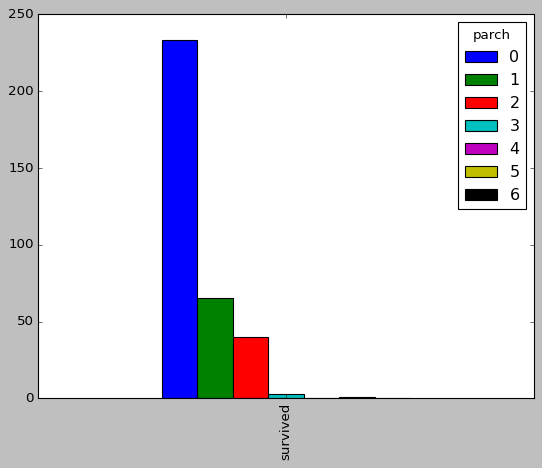

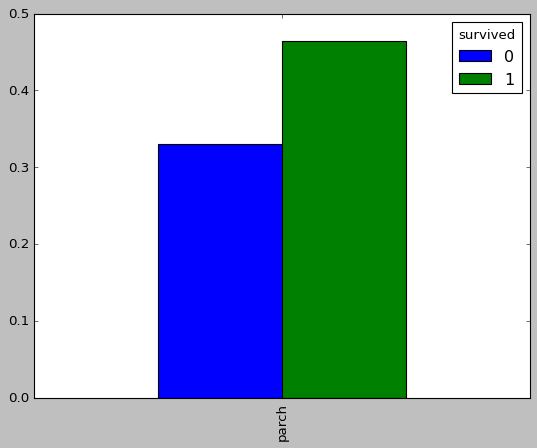

In [91]:
a = pd.DataFrame(pd.pivot_table(data, columns = 'parch', values = 'survived', aggfunc=sum))
a.plot.bar()
display(a)
a = pd.DataFrame(pd.pivot_table(data, columns = 'survived', values = 'parch', aggfunc=np.mean))
a.plot.bar()

sibsp,0,1,2,3,4,5,8
survived,210,112,13,4,3,0,0


<AxesSubplot:>

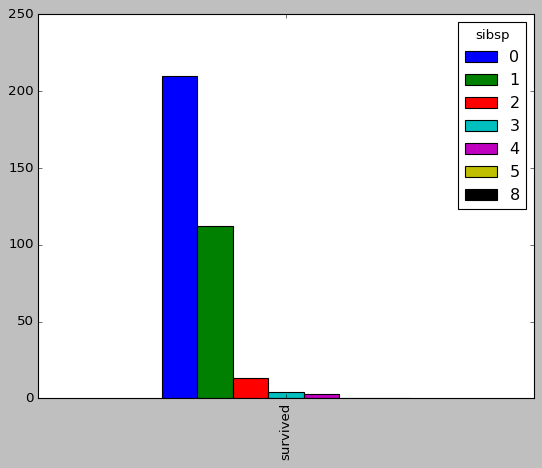

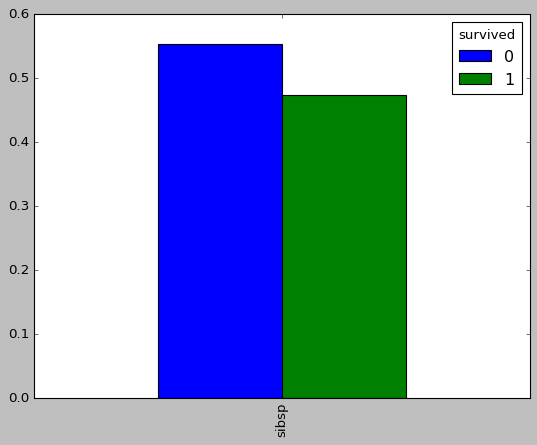

In [92]:
a = pd.DataFrame(pd.pivot_table(data, columns = 'sibsp', values = 'survived', aggfunc=sum))
a.plot.bar()
display(a)
a = pd.DataFrame(pd.pivot_table(data, columns = 'survived', values = 'sibsp', aggfunc=np.mean))
a.plot.bar()

<AxesSubplot:>

<AxesSubplot:>

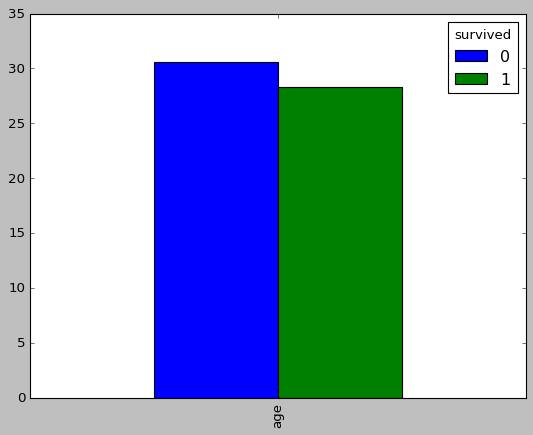

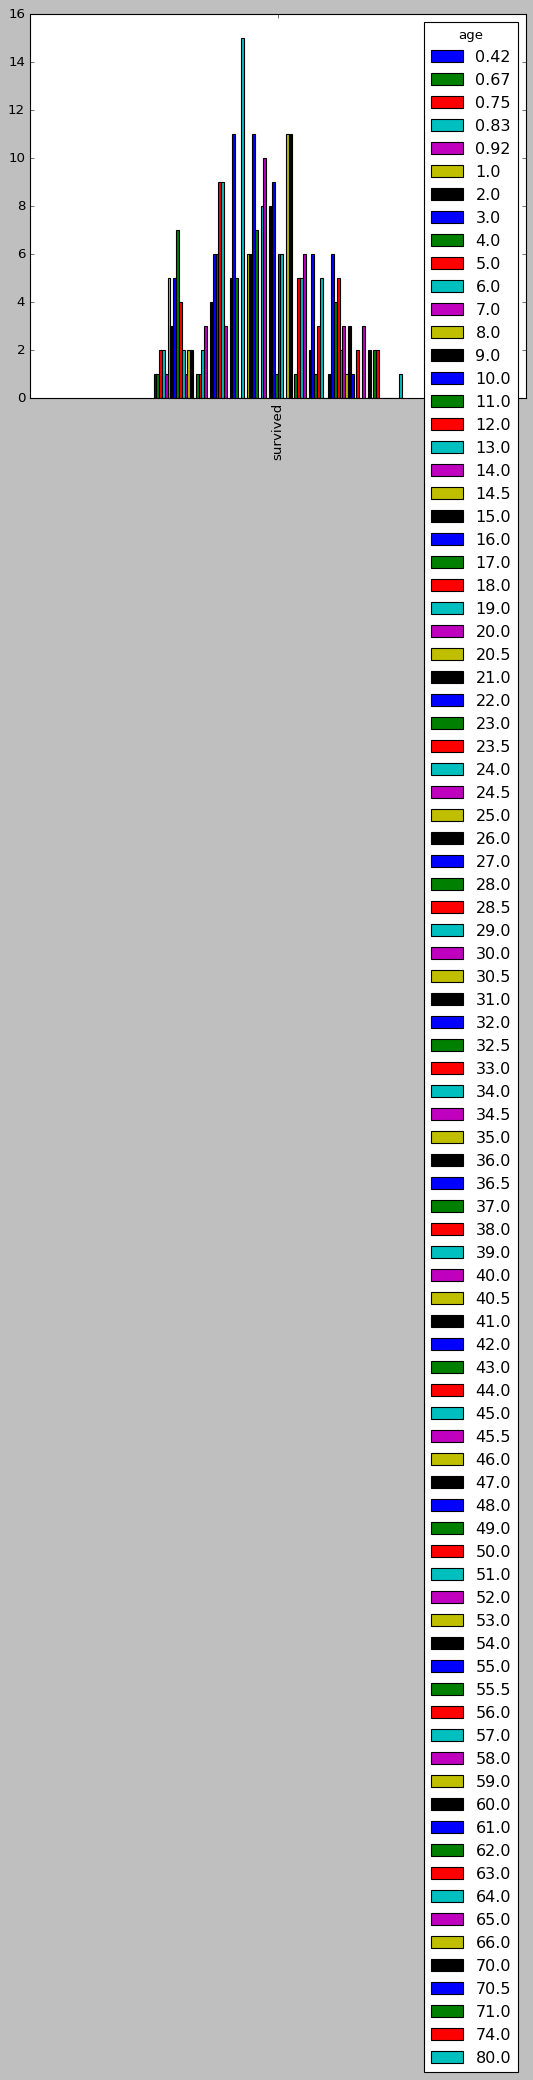

In [15]:
a = pd.DataFrame(pd.pivot_table(data, columns = 'survived', values = 'age', aggfunc=np.mean))
display(a.plot.bar())

a = pd.DataFrame(pd.pivot_table(data, columns = 'age', values = 'survived', aggfunc=sum))
display(a.plot.bar())


<AxesSubplot:>

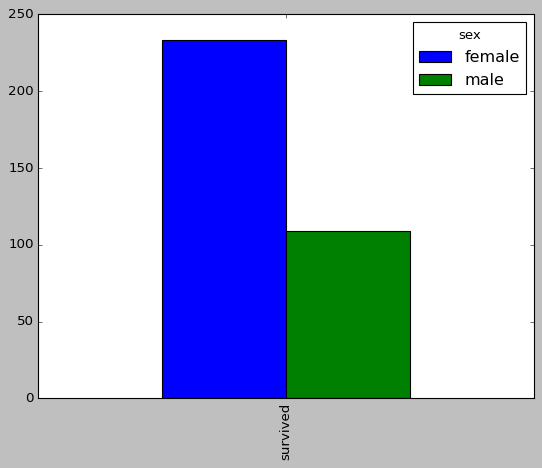

In [16]:
a = pd.DataFrame(pd.pivot_table(data, columns = 'sex', values = 'survived', aggfunc=sum))
display(a.plot.bar())

<AxesSubplot:>

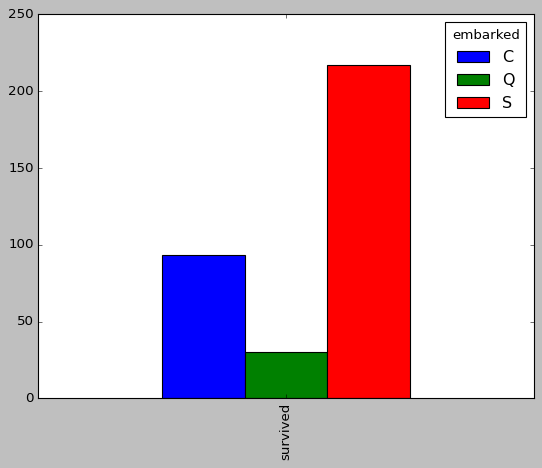

In [17]:
a = pd.DataFrame(pd.pivot_table(data, columns = 'embarked', values = 'survived', aggfunc=sum))
display(a.plot.bar())

In [23]:
data[data['sex'] == 'male']

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
889,1,1,male,26.0,0,0,30.0000,C


<AxesSubplot:xlabel='sibsp'>

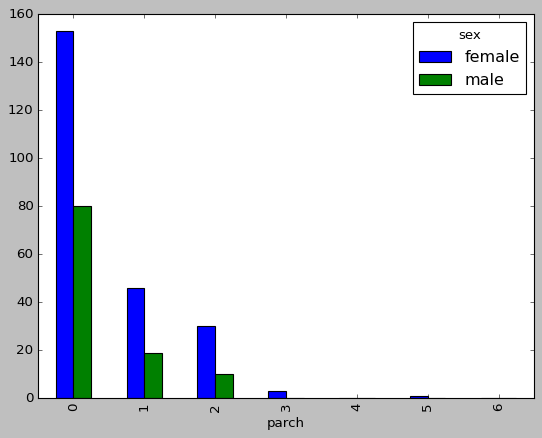

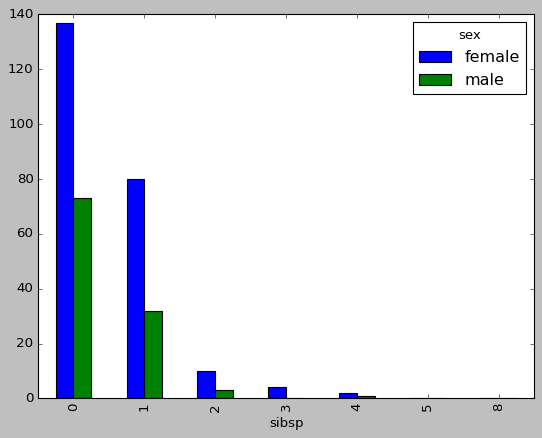

In [93]:
# Men with 'parch' survived less? with 'sibsp'?
#YES
pivot_parch = pd.pivot_table(data, 
                       columns = 'sex', 
                       index = 'parch',
                       values  = 'survived', 
                       aggfunc = sum, fill_value=0)
pivot_parch.plot.bar()


pivot_sibsp = pd.pivot_table(data, 
                       columns = 'sex', 
                       index = 'sibsp',
                       values  = 'survived', 
                       aggfunc = sum, fill_value=0)
pivot_sibsp.plot.bar()

In [95]:
female_data = data[data.sex == 'female']
male_data = data[data.sex == 'male']

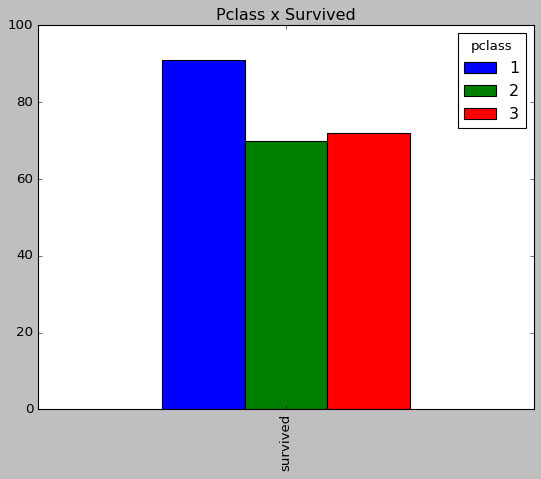

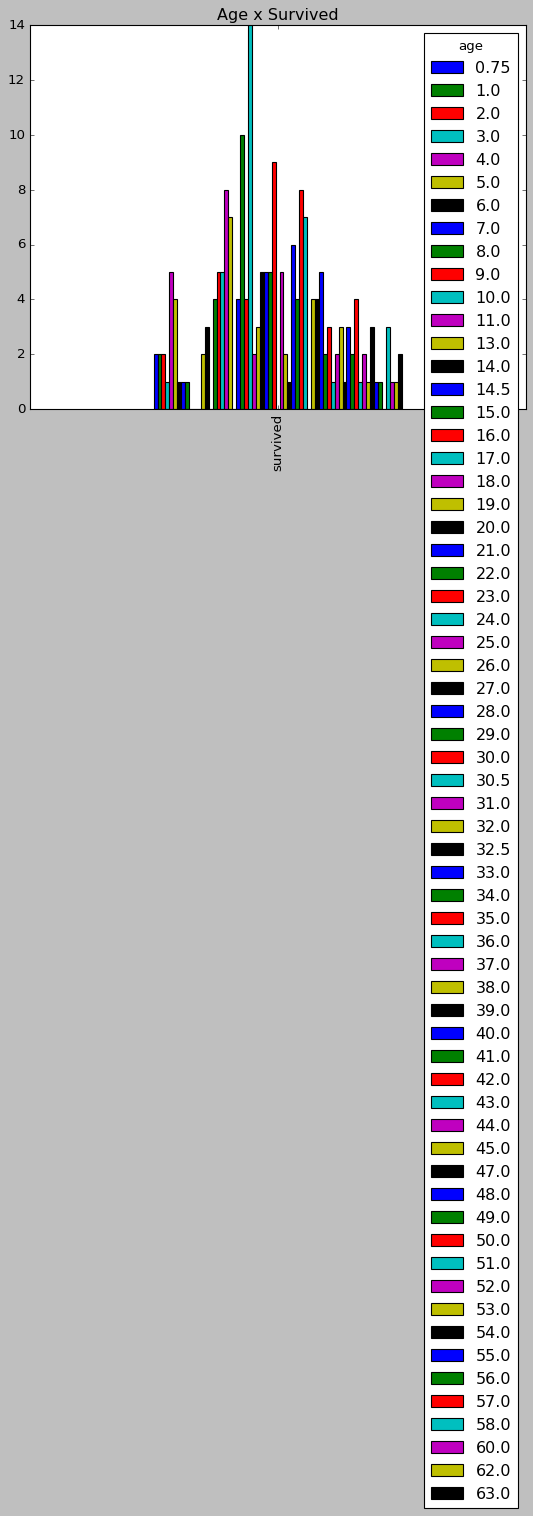

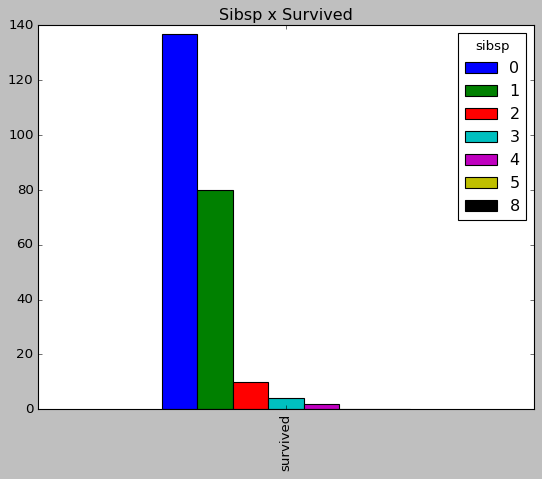

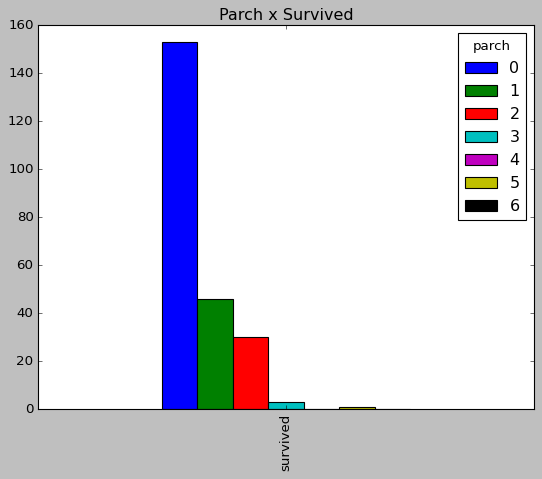

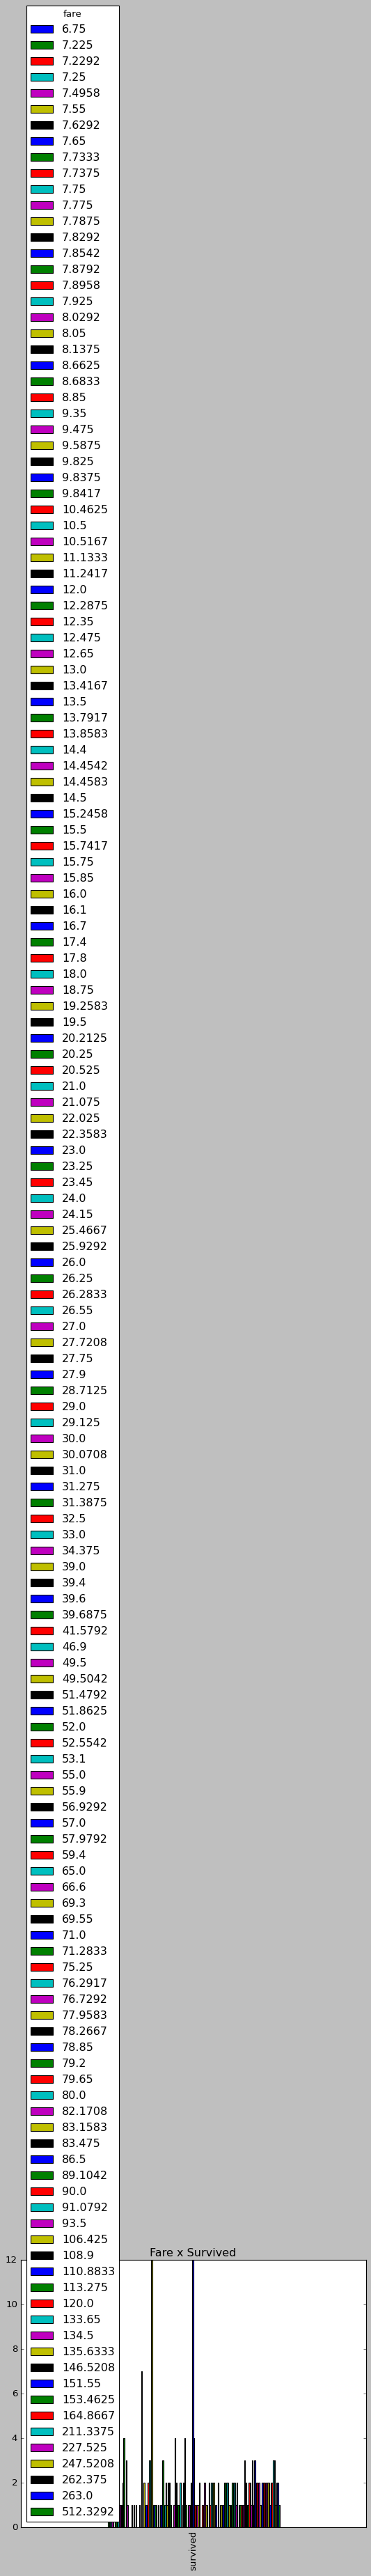

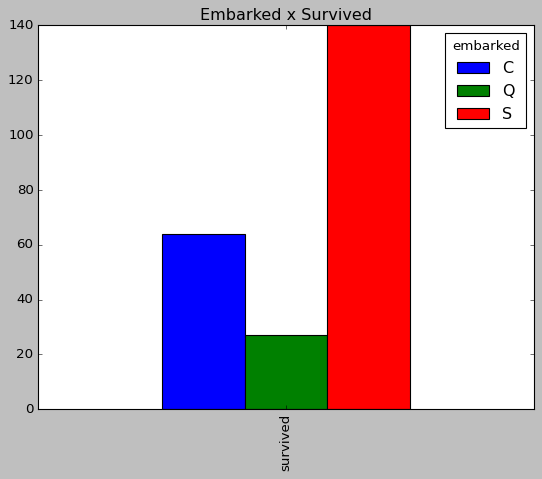

In [96]:
#What made women survived more?
for column in ['pclass','age','sibsp','parch','fare','embarked']:
    pivot_female = pd.pivot_table(female_data, columns = column, values = 'survived', aggfunc = sum)
    pivot_female.plot.bar(title = f'{column.capitalize()} x Survived')

#First class suvived more. ~15 more.
#Between 11 and 45 survived more.
# 0 - 1 sibsp = survived more. 0 parch suvived more.
# S port survived morte.
    


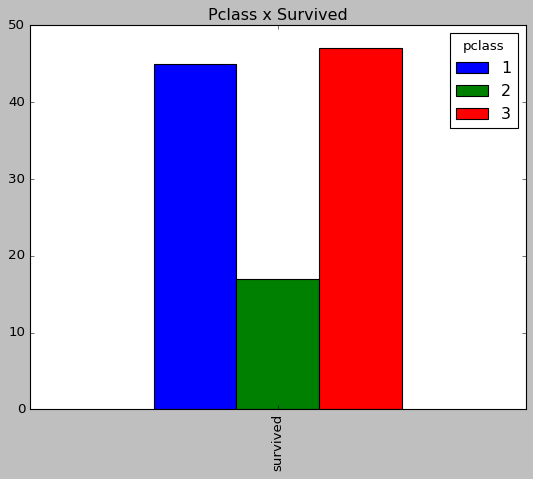

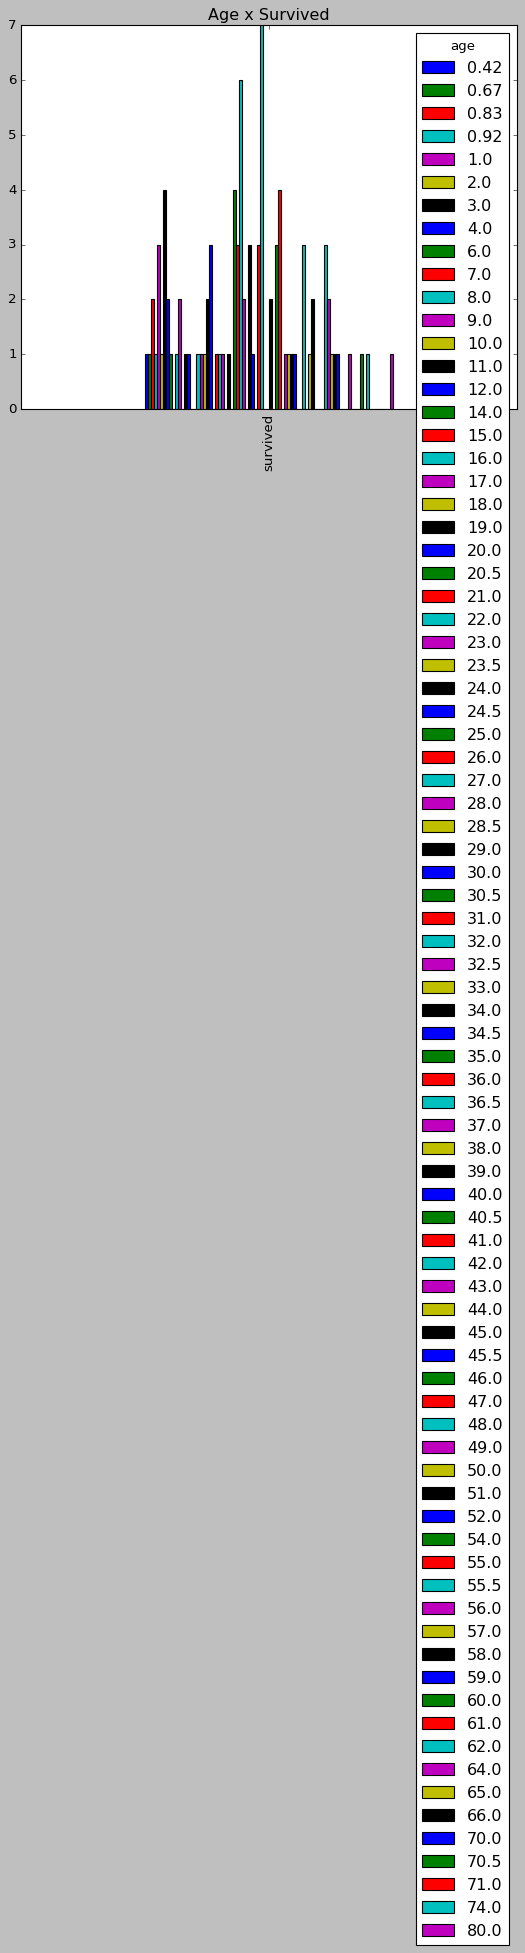

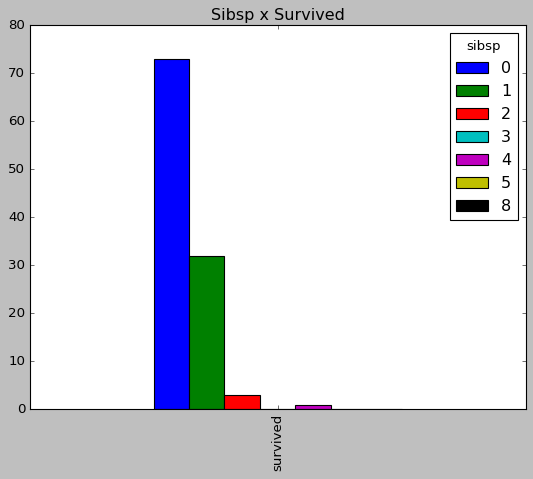

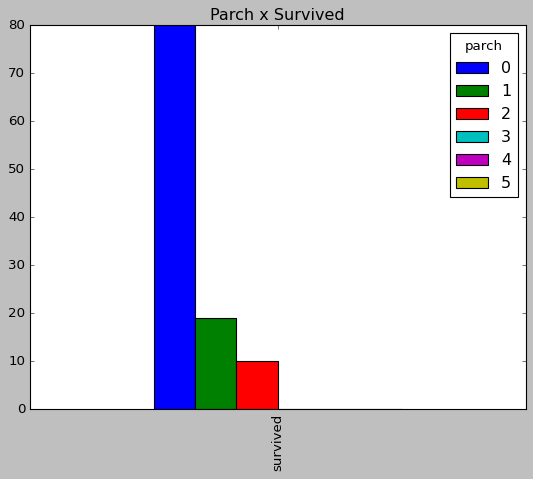

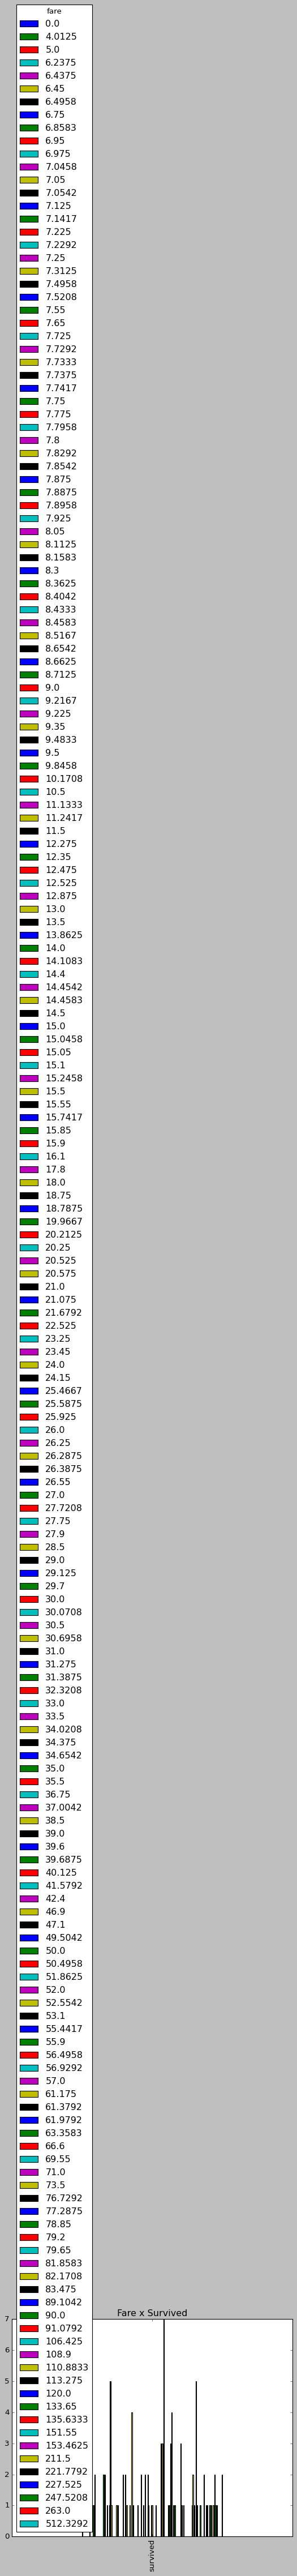

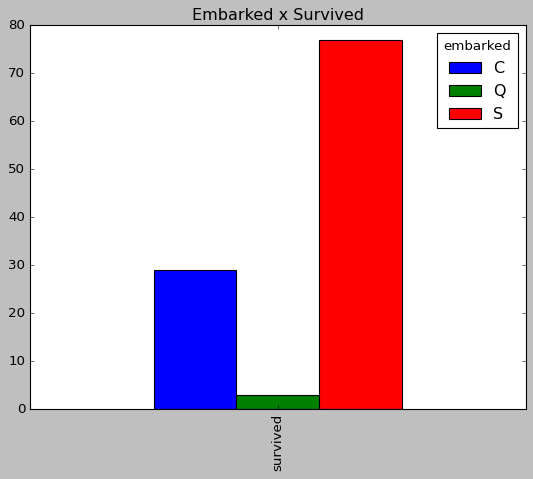

In [99]:
for column in ['pclass','age','sibsp','parch','fare','embarked']:
    pivot_female = pd.pivot_table(male_data, columns = column, values = 'survived', aggfunc = sum)
    pivot_female.plot.bar(title = f'{column.capitalize()} x Survived')

<AxesSubplot:>

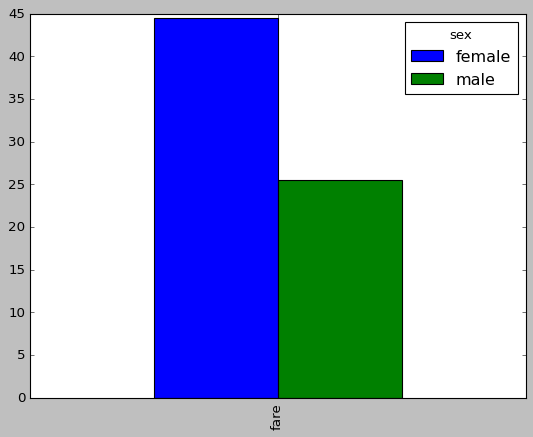

In [103]:
#Women paid less?
pivot_parch = pd.pivot_table(data, 
                       columns = 'sex', 
                       values  = 'fare', 
                       aggfunc = np.mean, fill_value=0)
pivot_parch.plot.bar()

In [107]:

data['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

age      embarked        fare       parch       sibsp      survived  \
sex    female male   female male female male female male female male   female   
pclass                                                                          
1          94  122       94  122     94  122     94  122     94  122       94   
2          76  108       76  108     76  108     76  108     76  108       76   
3         144  347      144  347    144  347    144  347    144  347      144   

             
sex    male  
pclass       
1       122  
2       108  
3       347

<AxesSubplot:xlabel='pclass'>

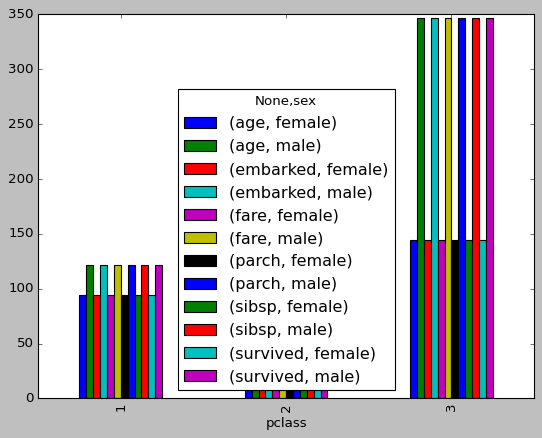

In [119]:
pivot_parch = pd.pivot_table(data, 
                             columns = 'sex',
                             index = 'pclass',
                             
                             aggfunc = len, fill_value=0)
display(pivot_parch)
pivot_parch.plot.bar()